In [ ]:
# https://python-course.eu/numerical-programming/net-income-method-example-with-numpy-matplotlib-and-scipy.php

In [2]:
import pandas as pd

with pd.ExcelFile("./data1/net_income_method_2020.xlsx") as xl:
    accounts2descr = xl.parse("account numbers", 
                              index_col=0)
    journal = xl.parse("journal", 
                       index_col=0,
                      )
    
journal.index = pd.to_datetime(journal.index)
journal.index

DatetimeIndex(['2020-04-02', '2020-04-02', '2020-04-02', '2020-04-02',
               '2020-04-02', '2020-04-02', '2020-04-05', '2020-04-05',
               '2020-04-05', '2020-04-05', '2020-04-09', '2020-04-09',
               '2020-04-10', '2020-04-10', '2020-04-10', '2020-04-10',
               '2020-04-10', '2020-04-10', '2020-04-13', '2020-04-13',
               '2020-04-13', '2020-04-26', '2020-04-26', '2020-04-26',
               '2020-04-26', '2020-04-27', '2020-05-03', '2020-05-03',
               '2020-05-03', '2020-05-03', '2020-05-05', '2020-05-05',
               '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
               '2020-05-11', '2020-05-11', '2020-05-11', '2020-05-11',
               '2020-05-13', '2020-05-18', '2020-05-25', '2020-05-25',
               '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-03',
               '2020-06-04', '2020-06-04', '2020-06-09', '2020-06-10',
               '2020-06-10', '2020-06-11', '2020-06-11', '2020-06-11',
      

In [3]:
accounts2descr

,description
account,
4400,revenue plant Munich
4401,revenue plant Frankfurt
4402,revenue plant Berlin
2010,souvenirs
2020,clothes
2030,other articles
2050,books
2100,insurances
2200,wages


In [4]:
journal[:10]

,account number,document number,description,tax rate,gross amount
date,,,,,
2020-04-02,4402,8983233038,"Zurkan, Köln",19,4105.98
2020-04-02,2010,57550799,"Birmann, Souvenirs",19,-1890.00
2020-04-02,2200,14989004,wages,0,-17478.23
2020-04-02,2500,12766279,"Filling Station, Petrol",19,-89.40
2020-04-02,4400,3733462359,"EnergyCom, Hamburg",19,4663.54
2020-04-02,4402,7526058231,"Enoigo, Strasbourg",19,2412.82
2020-04-05,4402,1157284466,"Qbooks, Frankfurt",7,2631.42
2020-04-05,4402,7009463592,"Qbooks, Köln",7,3628.45
2020-04-05,2020,68433353,"Jamdon, Clothes",19,-1900.00


In [5]:
account_sums = journal[["account number", "gross amount"]].groupby("account number").sum()
account_sums

,gross amount
account number,
2010,-4090.00
2020,-10500.80
2030,-1350.00
2050,-900.00
2100,-612.00
2200,-69912.92
2300,-18791.92
2400,-1597.10
2500,-89.40


In [6]:
income_accounts = account_sums[account_sums["gross amount"] > 0]
income_accounts

,gross amount
account number,
4400,37771.84
4401,69610.35
4402,61593.99


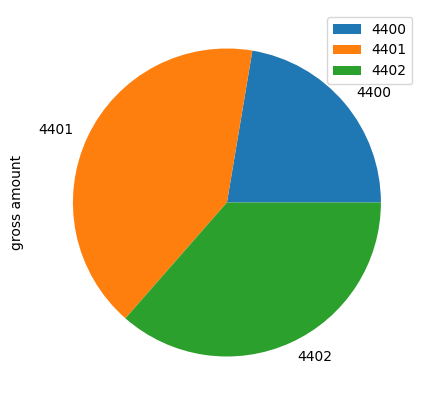

In [7]:
plot = income_accounts.plot(y='gross amount', figsize=(5, 5), kind="pie")

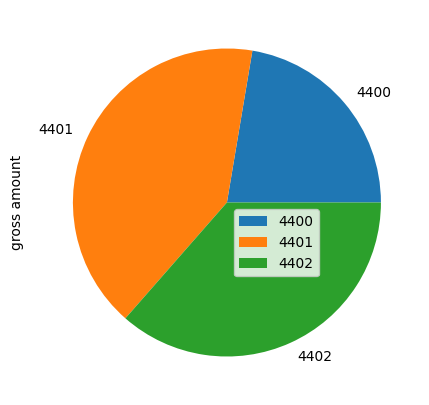

In [8]:
plot = income_accounts.plot(y='gross amount', 
                            figsize=(5, 5), 
                            kind="pie")
plot.legend(bbox_to_anchor=(0.5, 0.5),
            loc="upper left")

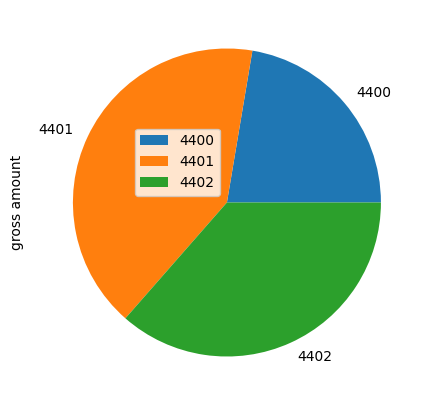

In [9]:
plot = income_accounts.plot(y='gross amount', figsize=(5, 5), kind="pie")
plot.legend(bbox_to_anchor=(0.5, 0.5),
            loc="lower right")

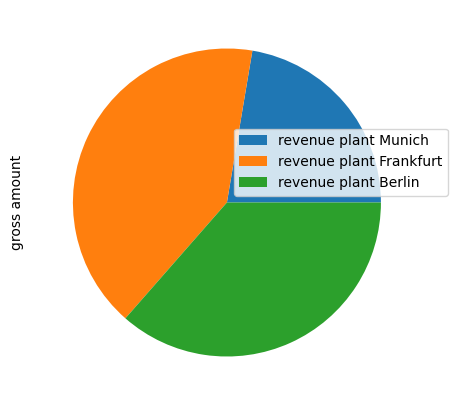

In [10]:
descriptions = accounts2descr["description"].loc[[4400, 4401, 4402]]
plot = income_accounts.plot(kind="pie",
                            y='gross amount', 
                            figsize=(5, 5),
                            labels=['', '', ''])

plot.legend(bbox_to_anchor=(0.5, 0.5), 
            loc="lower left",
            labels=descriptions)

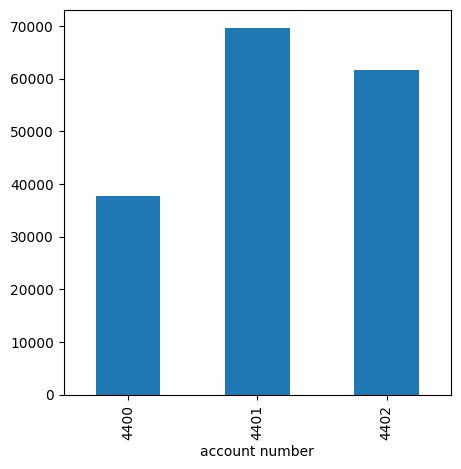

In [11]:
plot = income_accounts.plot(y='gross amount', 
                            figsize=(5, 5), 
                            kind="bar",
                            legend=False)

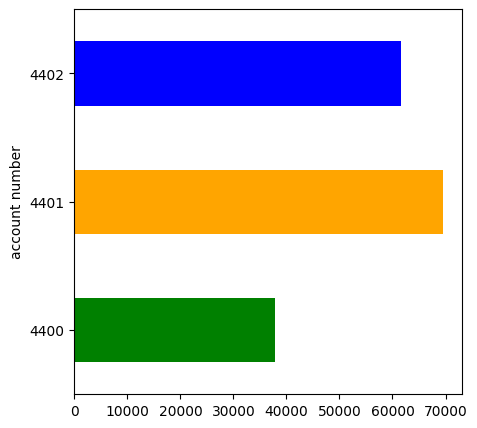

In [12]:
plot = income_accounts.plot(y='gross amount', 
                            figsize=(5, 5), 
                            kind="barh",
                            legend=False,
                            color=['green', 'orange', 'blue'])

In [13]:
expenses_accounts = account_sums[account_sums["gross amount"] < 0]
expenses_accounts

,gross amount
account number,
2010,-4090.00
2020,-10500.80
2030,-1350.00
2050,-900.00
2100,-612.00
2200,-69912.92
2300,-18791.92
2400,-1597.10
2500,-89.40


In [14]:
acc2descr_expenses = accounts2descr["description"].loc[expenses_accounts.index]
acc2descr_expenses

account number
2010            souvenirs
2020              clothes
2030       other articles
2050                books
2100           insurances
2200                wages
2300                loans
2400               hotels
2500               petrol
2600    telecommunication
2610             internet
Name: description, dtype: object

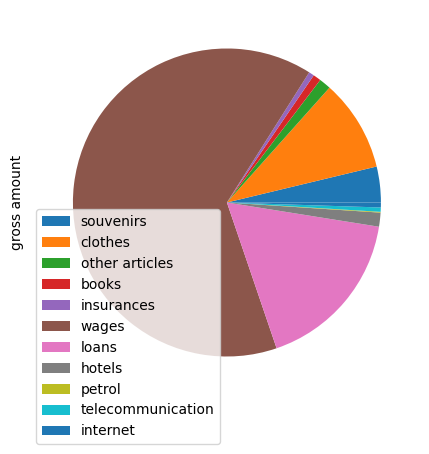

In [15]:
expenses_accounts.set_index(acc2descr_expenses.values, inplace=True)

expenses_accounts *= -1
labels = [''] * len(expenses_accounts)
plot = expenses_accounts.plot(kind="pie",
                            y='gross amount', 
                            figsize=(5, 5),
                            labels=labels)
plot.legend(bbox_to_anchor=(0.5, 0.5), 
            labels=expenses_accounts.index)

In [16]:
journal.drop(columns=["account number"])

,document number,description,tax rate,gross amount
date,,,,
2020-04-02,8983233038,"Zurkan, Köln",19,4105.98
2020-04-02,57550799,"Birmann, Souvenirs",19,-1890.00
2020-04-02,14989004,wages,0,-17478.23
2020-04-02,12766279,"Filling Station, Petrol",19,-89.40
2020-04-02,3733462359,"EnergyCom, Hamburg",19,4663.54
...,...,...,...,...
2020-07-25,5204418668,"BoKoData, Bodensee, Konstanz",19,3678.38
2020-07-25,85241331,"Hotel, Konstanz",7,-583.00
2020-07-27,26865618,"Hotel, Franfurt",7,-450.00


In [17]:
def tax_sums(journal_df, months=None):
    """ Returns a DataFrame with sales and tax rates -
         If a number or list is passed to 'months', only the sales
         of the corresponding months will be used.
         Example: tax_sums(df, months=[3, 6]) will only use the months
         3 (March) and 6 (June)"""
    if months:
        if isinstance(months, int):
            month_cond = journal_df.index.month == months
        elif isinstance(months, (list, tuple)):
            month_cond = journal_df.index.month.isin(months)
        positive = journal_df["gross amount"] > 0
        # sales_taxes eq. umsatzsteuer
        sales_taxes = journal_df[positive & month_cond]
        negative = journal_df["gross amount"] < 0
        # input_taxes equivalent to German Vorsteuer
        input_taxes = journal_df[negative & month_cond]   
    else:
        sales_taxes = journal_df[journal_df["gross amount"] > 0]
        input_taxes = journal_df[journal_df["gross amount"] < 0]
    
    sales_taxes = sales_taxes[["tax rate", "gross amount"]].groupby("tax rate").sum()
    sales_taxes.rename(columns={"gross amount": "Sales Gross"},
                       inplace=True)
    sales_taxes.index.name = 'Tax Rate'
    
    input_taxes = input_taxes[["tax rate", "gross amount"]].groupby("tax rate").sum()
    input_taxes.rename(columns={"gross amount": "Expenses Gross"},
                      inplace=True)
    input_taxes.index.name = 'Tax Rate'
    
    taxes = pd.concat([input_taxes, sales_taxes], axis=1)
    taxes.insert(1, 
                 column="Input Taxes", 
                 value=(taxes["Sales Gross"] * taxes.index / 100).round(2))
    taxes.insert(3, 
                 column="Sales Taxes", 
                 value=(taxes["Expenses Gross"] * taxes.index / 100).round(2))

    return taxes.fillna(0)

tax_sums(journal)

,Expenses Gross,Input Taxes,Sales Gross,Sales Taxes
Tax Rate,,,,
0,-90102.20,0.00,8334.43,-0.00
7,-3847.10,786.85,11240.71,-269.30
19,-14948.32,28386.20,149401.04,-2840.18


In [18]:
stsum_5 = tax_sums(journal, months=5)
stsum_6 = tax_sums(journal, months=6)
stsum_5

,Expenses Gross,Input Taxes,Sales Gross,Sales Taxes
Tax Rate,,,,
0,-22411.53,0.00,0.00,-0.00
7,-900.00,0.00,0.00,-63.00
19,-145.00,5952.51,31328.98,-27.55


In [19]:
tax_sums(journal, months=[5, 6])

,Expenses Gross,Input Taxes,Sales Gross,Sales Taxes
Tax Rate,,,,
0,-44812.14,0.00,6479.47,-0.00
7,-900.00,348.66,4980.84,-63.00
19,-268.12,12520.85,65899.23,-50.94
